In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_abalone=pd.read_csv('abalone.csv')
df_abalone.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df_abalone.columns=(['id','Sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','Rings'])
df_abalone.head()

,id,Sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df_abalone.drop('id',axis=1,inplace=True)
df_abalone.head()

,Sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df_abalone.shape

(4177, 9)

In [6]:
df_abalone.isnull().sum()

Sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
Rings             0
dtype: int64

<Figure size 1080x720 with 0 Axes>

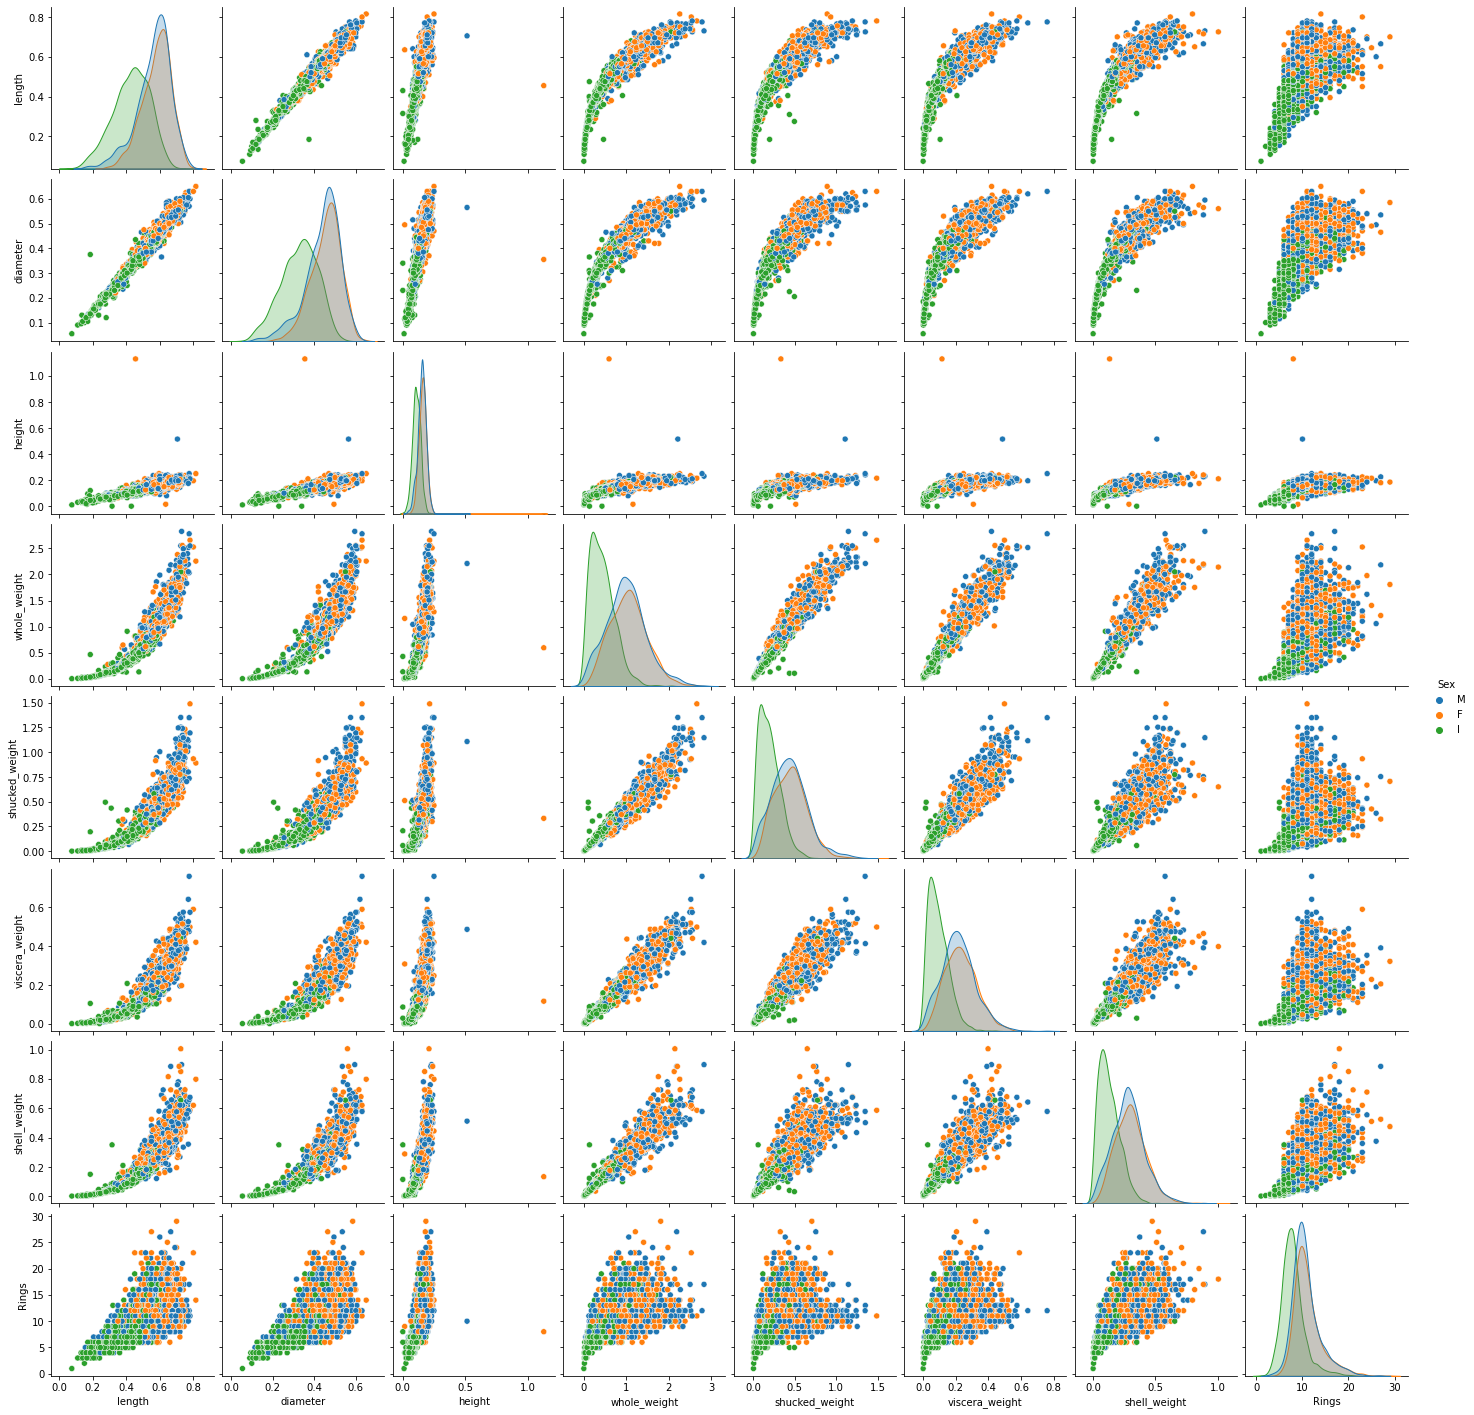

In [7]:
#visualizing the data to see the distribution of the data
plt.figure(figsize=(15,10))
sns.pairplot(df_abalone,hue='Sex')

In [8]:
df_abalone['Sex'].value_counts()


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [9]:
cont=[feature for feature in df_abalone.columns if len(df_abalone[feature].unique())>30]
cont

['length',
 'diameter',
 'height',
 'whole_weight',
 'shucked_weight',
 'viscera_weight',
 'shell_weight']

In [10]:
features=[feature for feature in df_abalone.columns if feature!='Sex']
features

['length',
 'diameter',
 'height',
 'whole_weight',
 'shucked_weight',
 'viscera_weight',
 'shell_weight',
 'Rings']

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


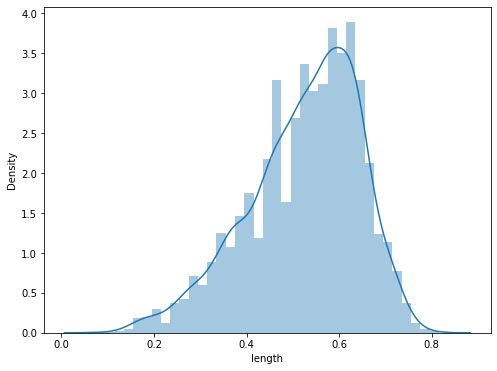

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


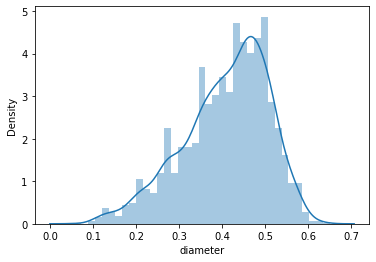

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


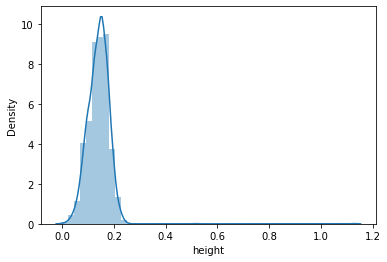

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


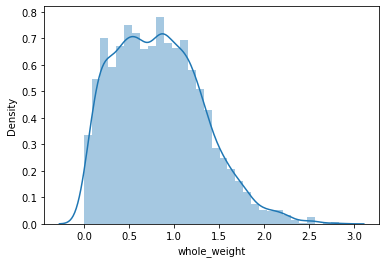

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


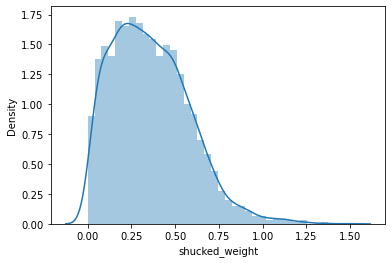

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


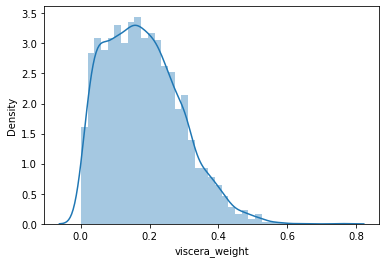

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


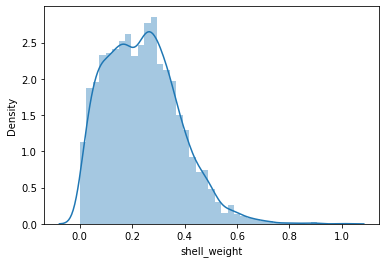

In [11]:
plt.figure(figsize=(8,6))
for feature in cont:
    sns.distplot(df_abalone[feature])
    plt.show()

### The categorical data is uniformly distributed

### feature engineering

#### since the knn is based on euclidean distance we need to scale down the data using normalization or standard scalar
#### since the data looks normally distributed we will use standardscaler

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scaled=df_abalone.drop('Sex',axis=1)
scaled=scale.fit_transform(x_scaled)
df_scaled=pd.DataFrame(scaled,columns=features)
df_scaled.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [14]:
# Sex feature is categorical we can encode it using onehotencoder since the data is nominal
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df_scaled['Sex']=encode.fit_transform(df_abalone['Sex'])
df_scaled.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings,Sex
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,2
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,2
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,2
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,1


In [15]:
x=df_scaled.drop('Sex',axis=1)

In [16]:
y=df_scaled['Sex']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
# fitting the data into machine learning model
model=KNeighborsClassifier()
model.fit(x_train,y_train)


KNeighborsClassifier()

In [18]:
#predicting the data
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [19]:
model.score(x_test,y_test)

0.5203349282296651

In [20]:
neighbours=np.arange(1,20)
leaf=np.arange(5,80)

In [21]:
params={
    'n_neighbors':neighbours,
'leaf_size':leaf}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
cv=RandomizedSearchCV(KNeighborsClassifier(),params,cv=5,return_train_score=False)

In [23]:
cv.fit(x,y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [24]:
cv.cv_results_

{'mean_fit_time': array([0.00389285, 0.00373006, 0.0035181 , 0.00352683, 0.00381932,
        0.00403085, 0.00378461, 0.00410023, 0.00354214, 0.0038228 ]),
 'std_fit_time': array([3.27513630e-04, 1.94363704e-04, 7.07244513e-05, 1.00272812e-04,
        7.10337898e-05, 5.19720776e-04, 1.23828597e-04, 6.44308466e-05,
        7.02867353e-05, 9.78316003e-05]),
 'mean_score_time': array([0.03540878, 0.03264909, 0.02633481, 0.02820764, 0.03063316,
        0.03433652, 0.03476191, 0.03171926, 0.03125753, 0.03434415]),
 'std_score_time': array([0.00127309, 0.00069225, 0.00055386, 0.00050347, 0.00050781,
        0.00108858, 0.00119495, 0.0007908 , 0.00079676, 0.00131036]),
 'param_n_neighbors': masked_array(data=[19, 16, 1, 2, 7, 17, 19, 6, 8, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_leaf_size': masked_array(data=[47, 31, 79, 66, 34, 41, 42, 24, 74, 31],
          

In [25]:
df_r=pd.DataFrame(cv.cv_results_)
df_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_leaf_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003893,0.000328,0.035409,0.001273,19,47,"{'n_neighbors': 19, 'leaf_size': 47}",0.510766,0.575359,0.529341,0.532934,0.550898,0.539860,0.021850,1
1,0.003730,0.000194,0.032649,0.000692,16,31,"{'n_neighbors': 16, 'leaf_size': 31}",0.494019,0.564593,0.535329,0.542515,0.542515,0.535794,0.023087,5
2,0.003518,0.000071,0.026335,0.000554,1,79,"{'n_neighbors': 1, 'leaf_size': 79}",0.465311,0.482057,0.465868,0.504192,0.489820,0.481450,0.014771,10
3,0.003527,0.000100,0.028208,0.000503,2,66,"{'n_neighbors': 2, 'leaf_size': 66}",0.480861,0.489234,0.486228,0.485030,0.482635,0.484798,0.002897,9
4,0.003819,0.000071,0.030633,0.000508,7,34,"{'n_neighbors': 7, 'leaf_size': 34}",0.500000,0.539474,0.483832,0.531737,0.536527,0.518314,0.022289,7
5,0.004031,0.000520,0.034337,0.001089,17,41,"{'n_neighbors': 17, 'leaf_size': 41}",0.511962,0.563397,0.526946,0.547305,0.543713,0.538665,0.017676,3
6,0.003785,0.000124,0.034762,0.001195,19,42,"{'n_neighbors': 19, 'leaf_size': 42}",0.510766,0.575359,0.529341,0.532934,0.550898,0.539860,0.021850,1
7,0.004100,0.000064,0.031719,0.000791,6,24,"{'n_neighbors': 6, 'leaf_size': 24}",0.501196,0.527512,0.502994,0.526946,0.524551,0.516640,0.011931,8
8,0.003542,0.000070,0.031258,0.000797,8,74,"{'n_neighbors': 8, 'leaf_size': 74}",0.490431,0.539474,0.518563,0.518563,0.544910,0.522388,0.019234,6
9,0.003823,0.000098,0.034344,0.001310,15,31,"{'n_neighbors': 15, 'leaf_size': 31}",0.515550,0.563397,0.531737,0.540120,0.542515,0.538664,0.015562,4


In [30]:
y_p=cv.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_true=y_test,y_pred=y_p)

<AxesSubplot:>

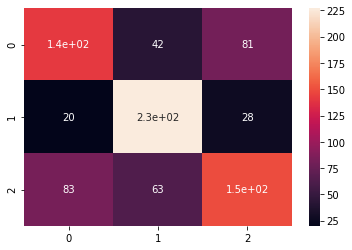

In [34]:
sns.heatmap(conf,annot=True)